<a href="https://colab.research.google.com/github/jimtzhou/Track/blob/master/Behavioural_Cloning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
!git clone https://github.com/jimtzhou/Track

fatal: destination path 'Track' already exists and is not an empty directory.


In [37]:
!ls Track



Behavioural_Cloning.ipynb  driving_log.csv  IMG


In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import cv2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import pandas as pd
import ntpath
import random


In [39]:
datadir = 'Track'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names = columns)
pd.set_option('display.max_colwidth', -1)
data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


,center,left,right,steering,throttle,reverse,speed
0,C:\Users\Jimmy\Desktop\Self_Driving\Sim\Sim_Data\IMG\center_2020_05_19_17_55_06_214.jpg,C:\Users\Jimmy\Desktop\Self_Driving\Sim\Sim_Data\IMG\left_2020_05_19_17_55_06_214.jpg,C:\Users\Jimmy\Desktop\Self_Driving\Sim\Sim_Data\IMG\right_2020_05_19_17_55_06_214.jpg,0.0,0.0,0,0.000078
1,C:\Users\Jimmy\Desktop\Self_Driving\Sim\Sim_Data\IMG\center_2020_05_19_17_55_06_321.jpg,C:\Users\Jimmy\Desktop\Self_Driving\Sim\Sim_Data\IMG\left_2020_05_19_17_55_06_321.jpg,C:\Users\Jimmy\Desktop\Self_Driving\Sim\Sim_Data\IMG\right_2020_05_19_17_55_06_321.jpg,0.0,0.0,0,0.000078
2,C:\Users\Jimmy\Desktop\Self_Driving\Sim\Sim_Data\IMG\center_2020_05_19_17_55_06_426.jpg,C:\Users\Jimmy\Desktop\Self_Driving\Sim\Sim_Data\IMG\left_2020_05_19_17_55_06_426.jpg,C:\Users\Jimmy\Desktop\Self_Driving\Sim\Sim_Data\IMG\right_2020_05_19_17_55_06_426.jpg,0.0,0.0,0,0.000078
3,C:\Users\Jimmy\Desktop\Self_Driving\Sim\Sim_Data\IMG\center_2020_05_19_17_55_06_533.jpg,C:\Users\Jimmy\Desktop\Self_Driving\Sim\Sim_Data\IMG\left_2020_05_19_17_55_06_533.jpg,C:\Users\Jimmy\Desktop\Self_Driving\Sim\Sim_Data\IMG\right_2020_05_19_17_55_06_533.jpg,0.0,0.0,0,0.000078
4,C:\Users\Jimmy\Desktop\Self_Driving\Sim\Sim_Data\IMG\center_2020_05_19_17_55_06_633.jpg,C:\Users\Jimmy\Desktop\Self_Driving\Sim\Sim_Data\IMG\left_2020_05_19_17_55_06_633.jpg,C:\Users\Jimmy\Desktop\Self_Driving\Sim\Sim_Data\IMG\right_2020_05_19_17_55_06_633.jpg,0.0,0.0,0,0.000078


In [40]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail

data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2020_05_19_17_55_06_214.jpg,left_2020_05_19_17_55_06_214.jpg,right_2020_05_19_17_55_06_214.jpg,0.0,0.0,0,0.000078
1,center_2020_05_19_17_55_06_321.jpg,left_2020_05_19_17_55_06_321.jpg,right_2020_05_19_17_55_06_321.jpg,0.0,0.0,0,0.000078
2,center_2020_05_19_17_55_06_426.jpg,left_2020_05_19_17_55_06_426.jpg,right_2020_05_19_17_55_06_426.jpg,0.0,0.0,0,0.000078
3,center_2020_05_19_17_55_06_533.jpg,left_2020_05_19_17_55_06_533.jpg,right_2020_05_19_17_55_06_533.jpg,0.0,0.0,0,0.000078
4,center_2020_05_19_17_55_06_633.jpg,left_2020_05_19_17_55_06_633.jpg,right_2020_05_19_17_55_06_633.jpg,0.0,0.0,0,0.000078


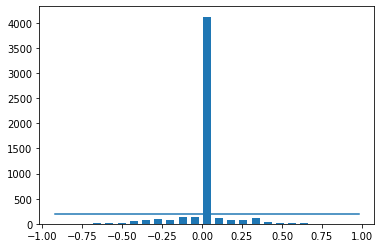

In [41]:
num_bins = 25
samples_per_bin = 200
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1] + bins[1:])*0.5

plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin,samples_per_bin))

total_data 5234
removed: 3924
remaining: 1310


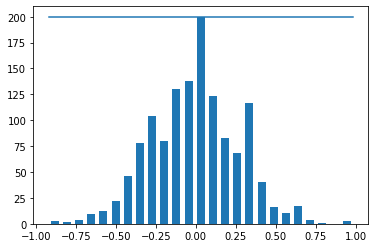

In [46]:
print('total_data', len(data))
remove_list = []
for j in range(num_bins):
  list_= []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)

print('removed:', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining:', len(data))

hist, _ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin,samples_per_bin))

In [50]:
print(data.iloc[1])
def load_img_steering(datadir, df):
  image_path = []
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths, steerings

image_paths, steerings = load_img_steering(datadir + '/IMG', data)

center      center_2020_05_19_17_55_06_740.jpg
left        left_2020_05_19_17_55_06_740.jpg  
right       right_2020_05_19_17_55_06_740.jpg 
steering    0                                 
throttle    0                                 
reverse     0                                 
speed       7.79554e-05                       
Name: 5, dtype: object


In [52]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size = 0.2, random_state = 6)
print ('Training samples: {} \nValid Samples: {}'.format(len(X_train), len(X_valid)))

Training samples: 1048 
Valid Samples: 262


Text(0.5, 1.0, 'Validation set')

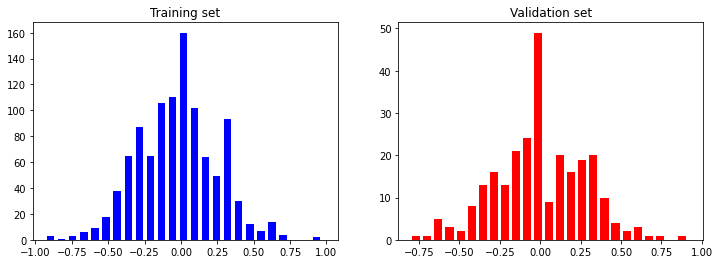

In [53]:
fig, axes = plt.subplots(1, 2, figsize =(12,4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color ='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins = num_bins, width = 0.05, color = 'red')
axes[1].set_title('Validation set')